<a href="https://colab.research.google.com/github/nchebet09/Restaurant-Recommender-System/blob/master/Akeed_2_Train_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Data Cleaning

Due to the large size of the data set, this notebook is broken down into different segments where each has been run independently. **With adequate RAM (16+GB), it is possible to run the notebook from start to end**.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# set the max row display  (500)
pd.set_option('display.max_rows', 500)

## Load the data sets

In [ ]:
# load the data
train = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/merged_train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Explore the data sets

In [ ]:
# preview train data
train.head()

,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,Work,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,Work,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,Yes,0.0,1.0,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,Work,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,Yes,0.0,1.0,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,Work,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,Yes,0.0,1.0,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,Work,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""}",1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:3

In [ ]:
# check the shape of the data
print('Train shape:', train.shape)

Train shape: (5802400, 76)


In [ ]:
# check train colum data types
d_types = pd.DataFrame(train.dtypes).reset_index()
d_types.columns = [['column', 'type']]
d_types.iloc[:,1].value_counts()

object     47
float64    17
int64      12
Name: (type,), dtype: int64

In [ ]:
# check train column names
train.columns

Index(['akeed_customer_id', 'gender', 'dob', 'status_x', 'verified_x',
       'language_x', 'created_at_x', 'updated_at_x', 'customer_id',
       'location_number', 'location_type', 'latitude_x', 'longitude_x', 'id',
       'authentication_id', 'latitude_y', 'longitude_y', 'vendor_category_en',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'OpeningTime', 'OpeningTime2', 'prepration_time', 'commission',
       'is_akeed_delivering', 'discount_percentage', 'status_y', 'verified_y',
       'rank', 'language_y', 'vendor_rating', 'sunday_from_time1',
       'sunday_to_time1', 'sunday_from_time2', 'sunday_to_time2',
       'monday_from_time1', 'monday_to_time1', 'monday_from_time2',
       'monday_to_time2', 'tuesday_from_time1', 'tuesday_to_time1',
       'tuesday_from_time2', 'tuesday_to_time2', 'wednesday_from_time1',
       'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
       'thursday_from_time1', 'thursday_to_time1', 'thursd

## Clean the data sets

In [ ]:
# check missing data
train.isnull().values.any()

True

In [ ]:
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,29.386116
2,dob,91.046808
3,status_x,0.000000
4,verified_x,0.000000
5,language_x,26.850958
6,created_at_x,0.000000
7,updated_at_x,0.000000
8,customer_id,0.000000
9,location_number,0.000000


In [ ]:
# drop time1 and time2 
cols = range(33, 61)

train.drop(train.columns[[cols]], axis=1, inplace=True)
train.drop(train.columns[[2,10]], axis=1, inplace=True)
train.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(5802400, 46)

In [ ]:
# check unique values
print(train['language_x'].value_counts())
print(train['language_y'].value_counts())
print(train['commission'].value_counts())
print(train['primary_tags'].value_counts())
print(train['open_close_flags'].value_counts())
print(train['one_click_vendor'].value_counts())

EN    4244400
Name: language_x, dtype: int64
EN    4932040
Name: language_y, dtype: int64
0.0    4932040
Name: commission, dtype: int64
{"primary_tags":"134"}     580240
{"primary_tags":"2396"}    464192
{"primary_tags":"8"}       290120
{"primary_tags":"1088"}    174072
{"primary_tags":"46"}      174072
{"primary_tags":"32"}      174072
{"primary_tags":"24"}      174072
{"primary_tags":"2072"}    174072
{"primary_tags":"701"}     174072
{"primary_tags":"21"}      116048
{"primary_tags":"28"}      116048
{"primary_tags":"90"}      116048
{"primary_tags":"534"}      58024
{"primary_tags":"336"}      58024
{"primary_tags":"71"}       58024
{"primary_tags":"260"}      58024
{"primary_tags":"1147"}     58024
{"primary_tags":"138"}      58024
{"primary_tags":"129"}      58024
{"primary_tags":"7"}        58024
{"primary_tags":"271"}      58024
{"primary_tags":"1256"}     58024
{"primary_tags":"15"}       58024
{"primary_tags":"323"}      58024
{"primary_tags":"52"}       58024
{"primary_tags

In [ ]:
# Renaming values in primary_tags
#
train['primary_tags'] = train['primary_tags'].str.replace(r'\D', '')
train.head()

,akeed_customer_id,gender,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,4,1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,Yes,0.0,1.0,1,11,EN,4.7,7,1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,Yes,0.0,1.0,1,1,EN,4.5,71,1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,Yes,0.0,1.0,1,11,EN,4.5,46,1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23,TCHWPBT,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,Yes,0.0,1.0,1,11,EN,4.4,32,1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0


In [ ]:
# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,29.386116
2,status_x,0.000000
3,verified_x,0.000000
4,language_x,26.850958
5,created_at_x,0.000000
6,updated_at_x,0.000000
7,customer_id,0.000000
8,location_number,0.000000
9,latitude_x,0.010341


In [ ]:
# drop commission, language_x and language_y. Also dropped duplicated rows customer_id, id_obj and location number_obj
# also vendor tag name, one_click_vendor, na display orders
train.drop(train.columns[[4,7,23,24,29,34,35,36,37,41,42,43]], axis=1, inplace=True)
train.shape

(5802400, 34)

In [ ]:
# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,29.386116
2,status_x,0.000000
3,verified_x,0.000000
4,created_at_x,0.000000
5,updated_at_x,0.000000
6,location_number,0.000000
7,latitude_x,0.010341
8,longitude_x,0.010341
9,id,0.000000


In [ ]:
# check unique values in gender
#
train['gender'].unique()

array(['Male', 'Female', 'Female  ', 'Female   ', 'Female    ', 'Male  ',
       '  ', 'Female ', nan, '?????', 'male'], dtype=object)

In [ ]:
# Replace values to male, female, and unknown
#
train['gender'] = train['gender'].replace(['Male', 'Male  ', 'male'], 'Male')
train['gender'] = train['gender'].replace(['Female', 'Female  ', 'Female   ', 'Female    ', 'Female '], 'Female')
train['gender'] = train['gender'].replace(['  ','?????'], 'Unknown')

# Filling null values Gender column
#
train['gender'] = train['gender'].fillna('Unknown')

# check_unique values
train['gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [ ]:
# Replacing na values in vendor_tag with 0 
train["vendor_tag"].fillna("0", inplace = True) 

train.head() 

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,open_close_flags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,1.0,1,11,4.4,4,1.0,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,1.0,1,11,4.7,7,1.0,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,1.0,1,1,4.5,71,1.0,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,1.0,1,11,4.5,46,1.0,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,1.0,1,11,4.4,32,1.0,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0


In [ ]:
# replace missing values with dash
#
train['OpeningTime'] = train['OpeningTime'].fillna('08:00AM-11:00PM')
train['OpeningTime2'] = train['OpeningTime2'].fillna('12:00AM-12:00AM')

train['OpeningTime'] = train['OpeningTime'].replace('-', '08:00AM-11:00PM')
train['OpeningTime2'] = train['OpeningTime2'].replace('-', '12:00AM-12:00AM')

In [ ]:
# replace unkown tags with 0
train['primary_tags'].fillna('0', inplace=True)

In [ ]:
# check unique values for anomalies
train['OpeningTime'].unique()

array(['11:00AM-11:30PM', '08:30AM-10:30PM', '08:00AM-10:45PM',
       '10:59AM-10:30PM', '11:00AM-11:45PM', '11:00AM-10:30PM',
       '09:00AM-11:30PM', '05:00PM-11:00PM', '08:00AM-11:30PM',
       '08:30AM-09:30PM', '11:00AM-11:00PM', '11:59AM-2:15 am',
       '08:00AM-12:30PM', '08:00AM-11:59PM', '10:00AM-11:45PM',
       '11:59AM-11:30PM', '08:30AM-11:45PM', '11:59AM-11:45PM',
       '11:00AM-10:45PM', '10:59AM-11:30PM', '11:15AM-10:00PM',
       '10:59AM-10:59PM', '09:59AM-11:45PM', '8:00AM-09:45PM',
       '04:00PM-11:45PM', '08:00AM-11:45PM', '11:15AM-10:30PM',
       '10:59AM-3:30PM', '11.30am-11:30PM', '11:00AM-11:59PM',
       '09:00AM-09:01AM', '11:59AM-10:45PM', '7:58AM-11:45PM',
       '09:00 AM-11:45 PM', '11:00AM-11:01PM', '05:30PM-11:59PM',
       '06:00PM-11:59PM', '11:59AM-10:45PM ', '11:00AM-3:50pm',
       '11:00AM-04:00PM', '09:00AM-08:00pm ', '09:00AM-11:00PM',
       '06:15AM-11:45PM', '9am-10pm', '08:30PM-11:59PM',
       '01.00PM-02:.00AM', '09:00AM-11:45PM', '

In [ ]:
# sort anomalies in the records
#
train['OpeningTime'] = train['OpeningTime'].str.replace('08:00AM-11:45-', '08:00AM-11:45PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('9-22', '09:00AM-10:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace(' ', '') # remove leading and trailing white spaces
train['OpeningTime'] = train['OpeningTime'].str.replace('am','AM')
train['OpeningTime'] = train['OpeningTime'].str.replace('pm','PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('9AM-10PM', '09:00AM-10:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('11AM-11PM', '11:00AM-11:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('01.00PM-02:.00AM', '01:00PM-02:00AM')
train['OpeningTime'] = train['OpeningTime'].str.replace('11:00AM-111:00PM', '11:00AM-11:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('8:00AM-09.45PM', '08:00AM-09:45PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('10:59AM-3:30PM', '10:59AM-03:30PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('08:00AM-3:30PM', '08:00AM-03:30PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('10:00AM-1:45PM', '10:00AM-01:45PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('9:00AM-11:00PM', '09:00AM-11:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('9:00AM-11:00PM', '09:00AM-11:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('11:59AM-2:15AM', '11:59AM-02:15AM')
train['OpeningTime'] = train['OpeningTime'].str.replace('11:00AM-3:50PM', '11:00AM-03:50PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('7:58AM-11:45PM', '07:58AM-11:45PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('009:00AM-11:00PM', '09:00AM-11:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace('00:01AM-01:00AM', '12:01AM-01:00AM')
train['OpeningTime'] = train['OpeningTime'].str.replace('.', ':')

In [ ]:
train['OpeningTime'] = train['OpeningTime'].str.replace('009:00AM-11:00PM', '09:00AM-11:00PM')

In [ ]:
# confirm anomalies are removed
train['OpeningTime'].unique()

array(['11:00AM-11:30PM', '08:30AM-10:30PM', '08:00AM-10:45PM',
       '10:59AM-10:30PM', '11:00AM-11:45PM', '11:00AM-10:30PM',
       '09:00AM-11:30PM', '05:00PM-11:00PM', '08:00AM-11:30PM',
       '08:30AM-09:30PM', '11:00AM-11:00PM', '11:59AM-02:15AM',
       '08:00AM-12:30PM', '08:00AM-11:59PM', '10:00AM-11:45PM',
       '11:59AM-11:30PM', '08:30AM-11:45PM', '11:59AM-11:45PM',
       '11:00AM-10:45PM', '10:59AM-11:30PM', '11:15AM-10:00PM',
       '10:59AM-10:59PM', '09:59AM-11:45PM', '08:00AM-09:45PM',
       '04:00PM-11:45PM', '08:00AM-11:45PM', '11:15AM-10:30PM',
       '10:59AM-03:30PM', '11:30AM-11:30PM', '11:00AM-11:59PM',
       '09:00AM-09:01AM', '11:59AM-10:45PM', '07:58AM-11:45PM',
       '09:00AM-11:45PM', '11:00AM-11:01PM', '05:30PM-11:59PM',
       '06:00PM-11:59PM', '11:00AM-03:50PM', '11:00AM-04:00PM',
       '09:00AM-08:00PM', '09:00AM-11:00PM', '06:15AM-11:45PM',
       '09:00AM-10:00PM', '08:30PM-11:59PM', '01:00PM-02:00AM',
       '05:00PM-11:59PM', '05:00PM-11:45

In [ ]:
# check unique values for anomalies
train['OpeningTime2'].unique()

array(['12:00AM-12:00AM', '05:00PM-11:30PM', '06:30PM-11:00PM',
       '12:00AM-01:00AM', '00:01AM-02:30AM', '6:10pm-12:00am',
       '06:00PM-11:45PM', '10pm-11pm', '01.00PM-02.00AM',
       '05:15PM-09:30PM ', '09:00AM-11:59PM'], dtype=object)

In [ ]:
# sort anomalies in the records
#
train['OpeningTime2'] = train['OpeningTime2'].str.replace('10pm-11pm', '10:00PM-11:00PM')
train['OpeningTime2'] = train['OpeningTime2'].str.replace('6:10pm-12:00am', '06:10PM-12:00AM')
train['OpeningTime2'] = train['OpeningTime2'].str.strip() # remove leading and trailing white spaces
train['OpeningTime2'] = train['OpeningTime2'].str.replace('00:01AM-02:30AM', '12:01AM-02:30AM')
train['OpeningTime2'] = train['OpeningTime2'].str.replace('.', ':')

In [ ]:
train['OpeningTime2'].unique()

array(['12:00AM-12:00AM', '05:00PM-11:30PM', '06:30PM-11:00PM',
       '12:00AM-01:00AM', '12:01AM-02:30AM', '06:10PM-12:00AM',
       '06:00PM-11:45PM', '10:00PM-11:00PM', '01:00PM-02:00AM',
       '05:15PM-09:30PM', '09:00AM-11:59PM'], dtype=object)

In [ ]:
# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,0.000000
2,status_x,0.000000
3,verified_x,0.000000
4,created_at_x,0.000000
5,updated_at_x,0.000000
6,location_number,0.000000
7,latitude_x,0.010341
8,longitude_x,0.010341
9,id,0.000000


In [ ]:
# split openingtime columns
#
train[['Open', 'Close']] = train.OpeningTime.str.split('-', expand=True, n=2)
train[['Open2', 'Close2']] = train.OpeningTime2.str.split('-', expand=True, n=2)
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,open_close_flags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,Open,Close,Open2,Close2
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,12:00AM-12:00AM,15,0.0,1.0,1,11,4.4,4,1.0,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,11:00AM,11:30PM,12:00AM,12:00AM
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,12:00AM-12:00AM,14,0.0,1.0,1,11,4.7,7,1.0,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,08:30AM,10:30PM,12:00AM,12:00AM
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,12:00AM-12:00AM,19,0.0,1.0,1,1,4.5,71,1.0,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,08:00AM,10:45PM,12:00AM,12:00AM
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,12:00AM-12:00AM,16,0.0,1.0,1,11,4.5,46,1.0,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,10:59AM,10:30PM,12:00AM,12:00AM
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,12:00AM-12:00AM,10,0.0,1.0,1,11,4.4,32,1.0,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,11:00AM,11:45PM,12:00AM,12:00AM


In [ ]:
train.Open.unique()

array(['11:00AM', '08:30AM', '08:00AM', '10:59AM', '09:00AM', '05:00PM',
       '11:59AM', '10:00AM', '11:15AM', '09:59AM', '04:00PM', '11:30AM',
       '07:58AM', '05:30PM', '06:00PM', '06:15AM', '08:30PM', '01:00PM',
       '04:59PM', '12:00PM', '12:01AM'], dtype=object)

In [ ]:
train.columns

Index(['akeed_customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'latitude_x', 'longitude_x', 'id',
       'authentication_id', 'latitude_y', 'longitude_y', 'vendor_category_en',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'OpeningTime', 'OpeningTime2', 'prepration_time', 'discount_percentage',
       'status_y', 'verified_y', 'rank', 'vendor_rating', 'primary_tags',
       'open_close_flags', 'vendor_tag', 'created_at_y', 'updated_at_y',
       'device_type', 'CID X LOC_NUM X VENDOR', 'target', 'Open', 'Close',
       'Open2', 'Close2'],
      dtype='object')

In [ ]:
# save file in drive
train.to_csv('/content/drive/My Drive/Akeed Recommendation Files/midclean_train.csv', index =False)

In [ ]:
# load the data
train = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/midclean_train.csv')
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,open_close_flags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,Open,Close,Open2,Close2
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,12:00AM-12:00AM,15,0.0,1.0,1,11,4.4,4,1.0,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,11:00AM,11:30PM,12:00AM,12:00AM
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,12:00AM-12:00AM,14,0.0,1.0,1,11,4.7,7,1.0,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,08:30AM,10:30PM,12:00AM,12:00AM
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,12:00AM-12:00AM,19,0.0,1.0,1,1,4.5,71,1.0,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,08:00AM,10:45PM,12:00AM,12:00AM
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,12:00AM-12:00AM,16,0.0,1.0,1,11,4.5,46,1.0,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,10:59AM,10:30PM,12:00AM,12:00AM
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,12:00AM-12:00AM,10,0.0,1.0,1,11,4.4,32,1.0,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,11:00AM,11:45PM,12:00AM,12:00AM


In [ ]:
# drop OpeningTime columns
train.drop(train.columns[[18, 19]], axis=1, inplace=True)
train.shape


(5802400, 36)

In [ ]:
# convert string time to time format
import datetime

open, close, open2, close2  = train.Open, train.Close, train.Open2, train.Close2
open_time, close_time, open2_time, close2_time = [], [] ,[], []

for time in open:
  # time = timeconvert(time)
  time = datetime.datetime.strptime(time, '%I:%M%p').time()
  open_time.append(time)

for time in close:
  # time = timeconvert(time)
  time = datetime.datetime.strptime(time, '%I:%M%p').time()
  close_time.append(time)

for time in open2:
  # time = timeconvert(time)
  time = datetime.datetime.strptime(time, '%I:%M%p').time()
  open2_time.append(time)

for time in close2:
  # time = timeconvert(time)
  time = datetime.datetime.strptime(time, '%I:%M%p').time()
  close2_time.append(time)

train.Open, train.Close, train.Open2, train.Close2 = open_time, close_time, open2_time, close2_time
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,open_close_flags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,Open,Close,Open2,Close2
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,1.0,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,11:00:00,23:30:00,00:00:00,00:00:00
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,1.0,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,08:30:00,22:30:00,00:00:00,00:00:00
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,1.0,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,08:00:00,22:45:00,00:00:00,00:00:00
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,1.0,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,10:59:00,22:30:00,00:00:00,00:00:00
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,1.0,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,11:00:00,23:45:00,00:00:00,00:00:00


In [ ]:
train.shape

(5802400, 36)

In [ ]:
# split string
train.Open = train.Open.astype(str).str.split(':').str[0]
train.Close = train.Close.astype(str).str.split(':').str[0]
train.Open2 = train.Open2.astype(str).str.split(':').str[0]
train.Close2 = train.Close2.astype(str).str.split(':').str[0]
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,open_close_flags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,Open,Close,Open2,Close2
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,1.0,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,11,23,00,00
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,1.0,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,08,22,00,00
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,1.0,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,08,22,00,00
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,1.0,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,10,22,00,00
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,1.0,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,11,23,00,00


In [ ]:
# compute hours vendor is open
train['duration'] = (((train.Close).astype(int) - (train.Open).astype(int)) + ((train.Close2).astype(int) - (train.Open2).astype(int)))
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,open_close_flags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,Open,Close,Open2,Close2,duration
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,1.0,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,11,23,00,00,12
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,1.0,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,08,22,00,00,14
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,1.0,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,08,22,00,00,14
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,1.0,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,10,22,00,00,12
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,1.0,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,11,23,00,00,12


In [ ]:
# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,0.000000
2,status_x,0.000000
3,verified_x,0.000000
4,created_at_x,0.000000
5,updated_at_x,0.000000
6,location_number,0.000000
7,latitude_x,0.010341
8,longitude_x,0.010341
9,id,0.000000


In [ ]:
train.drop(train.columns[[35,34,33,32,25]], axis=1, inplace=True)
train.columns

Index(['akeed_customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'latitude_x', 'longitude_x', 'id',
       'authentication_id', 'latitude_y', 'longitude_y', 'vendor_category_en',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'prepration_time', 'discount_percentage', 'status_y', 'verified_y',
       'rank', 'vendor_rating', 'primary_tags', 'vendor_tag', 'created_at_y',
       'updated_at_y', 'device_type', 'CID X LOC_NUM X VENDOR', 'target',
       'duration'],
      dtype='object')

In [ ]:
# change created at column to date time
train['created_at_x'] = pd.to_datetime(train['created_at_x']) # for the customer account
train['created_at_y'] = pd.to_datetime(train['created_at_y']) # for the order
print('Created_at_ dtypes:', train['created_at_x'].dtype, train['created_at_y'].dtype) 

# change created at column to date time
train['updated_at_x'] = pd.to_datetime(train['updated_at_x']) # for the customer account
train['updated_at_y'] = pd.to_datetime(train['updated_at_y']) # for the order
print('Updated_at_ dtypes:', train['updated_at_x'].dtype, train['updated_at_y'].dtype) 

Created_at_ dtypes: datetime64[ns] datetime64[ns]
Updated_at_ dtypes: datetime64[ns] datetime64[ns]


In [ ]:
# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,0.000000
2,status_x,0.000000
3,verified_x,0.000000
4,created_at_x,0.000000
5,updated_at_x,0.000000
6,location_number,0.000000
7,latitude_x,0.010341
8,longitude_x,0.010341
9,id,0.000000


In [ ]:
# save file in drive
train.to_csv('/content/drive/My Drive/Akeed Recommendation Files/midclean_train.csv', index =False)

In [ ]:
# load the data
train = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/midclean_train.csv')
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,duration
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,12
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,14
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,14
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,12
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,12


In [ ]:
# drop rows with missing coordinates
train.dropna(inplace=True)
train.shape

(5801800, 32)

In [ ]:
# for working with coordinates
!pip install haversine

In [ ]:
# compute distance between vendor and customer
from haversine import haversine, Unit

haversine_dist = []
for index, row in train.iterrows():
  customer = (row[7], row[8])
  vendor = (row[11], row[12])
  hd = haversine(customer, vendor)
  haversine_dist.append(hd)

In [ ]:
# assign variable to dataframe
train['haversine_dist'] = haversine_dist
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,12,10210.781498
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,14,10223.800918
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,14,10232.068678
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,12,10211.117900
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,12,10331.347778


In [ ]:
# encode gender column
train['gender'] = train['gender'].map({'Male':0 , 'Female':1, 'Unknown':2})
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist
0,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,12,10210.781498
1,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,14,10223.800918
2,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,14,10232.068678
3,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,12,10211.117900
4,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,12,10331.347778


In [ ]:
# convert created and updated_at columns to datetime
train['created_at_x'] = pd.to_datetime(train['created_at_x'])
train['created_at_y'] = pd.to_datetime(train['created_at_y'])
train['updated_at_x'] = pd.to_datetime(train['updated_at_x'])
train['updated_at_y'] = pd.to_datetime(train['updated_at_y'])
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist
0,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,12,10210.781498
1,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,14,10223.800918
2,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,14,10232.068678
3,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,12,10211.117900
4,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,12,10331.347778


In [ ]:
# get time difference
train['c_diff'] = train['created_at_y'] - train['created_at_x']
train['u_diff'] = train['updated_at_y'] - train['updated_at_x']
train.head()

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,created_at_y,updated_at_y,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",2018-01-30 14:42:04,2020-04-07 15:12:43,3,TCHWPBT X 0 X 4,0,12,10210.781498,-9 days +19:25:41,789 days 19:56:20
1,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",2018-05-03 12:32:06,2020-04-05 20:46:03,3,TCHWPBT X 0 X 13,0,14,10223.800918,84 days 17:15:43,788 days 01:29:40
2,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",2018-05-04 22:28:22,2020-04-07 16:35:55,3,TCHWPBT X 0 X 20,0,14,10232.068678,86 days 03:11:59,789 days 21:19:32
3,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",2018-05-06 19:20:48,2020-04-02 00:56:17,3,TCHWPBT X 0 X 23,0,12,10211.117900,88 days 00:04:25,784 days 05:39:54
4,TCHWPBT,0,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,2018-05-17 22:12:38,2020-04-05 15:57:41,3,TCHWPBT X 0 X 28,0,12,10331.347778,99 days 02:56:15,787 days 20:41:18


In [ ]:
pd.DataFrame(train.isnull().sum() * 100).reset_index()

,index,0
0,akeed_customer_id,0
1,gender,0
2,status_x,0
3,verified_x,0
4,created_at_x,0
5,updated_at_x,0
6,location_number,0
7,latitude_x,0
8,longitude_x,0
9,id,0


In [ ]:
# drop created an updated_at columns
train.drop(train.columns[[4, 5, 26, 27]], axis=1, inplace=True)
train.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",3,TCHWPBT X 0 X 4,0,12,10210.781498,-9 days +19:25:41,789 days 19:56:20
1,TCHWPBT,0,1,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",3,TCHWPBT X 0 X 13,0,14,10223.800918,84 days 17:15:43,788 days 01:29:40
2,TCHWPBT,0,1,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",3,TCHWPBT X 0 X 20,0,14,10232.068678,86 days 03:11:59,789 days 21:19:32
3,TCHWPBT,0,1,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",3,TCHWPBT X 0 X 23,0,12,10211.117900,88 days 00:04:25,784 days 05:39:54
4,TCHWPBT,0,1,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,3,TCHWPBT X 0 X 28,0,12,10331.347778,99 days 02:56:15,787 days 20:41:18


In [ ]:
# drop c_diff column with negatives
train = train.drop('c_diff', 1)

# split string and retain no. of days
train.u_diff = train.u_diff.astype(str).str.split(' days ').str[0]
train.head()

In [ ]:
# rename columns
train.rename(columns={'latitude_x': 'latitude_customer', 'latitude_y': 'latitude_vendor', 
                      'longitude_x': 'longitude_customer', 'longitude_y': 'longitude_vendor'}, inplace=True)
train.columns

Index(['akeed_customer_id', 'gender', 'status_x', 'verified_x',
       'location_number', 'latitude_customer', 'longitude_customer', 'id',
       'authentication_id', 'latitude_vendor', 'longitude_vendor',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'prepration_time', 'discount_percentage',
       'status_y', 'verified_y', 'rank', 'vendor_rating', 'primary_tags',
       'vendor_tag', 'device_type', 'CID X LOC_NUM X VENDOR', 'target',
       'duration', 'haversine_dist', 'c_diff', 'u_diff'],
      dtype='object')

In [ ]:
train.shape

(5801800, 31)

In [ ]:
pd.DataFrame(train.isnull().sum() * 100).reset_index()

,index,0
0,akeed_customer_id,0
1,gender,0
2,status_x,0
3,verified_x,0
4,location_number,0
5,latitude_customer,0
6,longitude_customer,0
7,id,0
8,authentication_id,0
9,latitude_vendor,0


In [ ]:
# save file in drive
train.to_csv('/content/drive/My Drive/Akeed Recommendation Files/clean_train.csv', index =False)

In [ ]:
# load the csv
train = pd.read_csv('/content/drive/My Drive/Akeed Recommendation Files/clean_train.csv')

In [ ]:
# drop c_diff column with negatives
train = train.drop('c_diff', 1)

# split string and retain no. of days
train.u_diff = train.u_diff.astype(str).str.split(' days ').str[0]
train.head()

,akeed_customer_id,gender,status_x,verified_x,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,primary_tags,vendor_tag,device_type,CID X LOC_NUM X VENDOR,target,duration,haversine_dist,u_diff
0,TCHWPBT,0,1,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15,0.0,1.0,1,11,4.4,4,"2,4,5,8,91,22,12,24,16,23",3,TCHWPBT X 0 X 4,0,12,10210.781498,789
1,TCHWPBT,0,1,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14,0.0,1.0,1,11,4.7,7,"4,41,51,34,27,15,24,16,28",3,TCHWPBT X 0 X 13,0,14,10223.800918,788
2,TCHWPBT,0,1,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19,0.0,1.0,1,1,4.5,71,"4,8,91,10",3,TCHWPBT X 0 X 20,0,14,10232.068678,789
3,TCHWPBT,0,1,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16,0.0,1.0,1,11,4.5,46,"5,8,30,24",3,TCHWPBT X 0 X 23,0,12,10211.117900,784
4,TCHWPBT,0,1,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10,0.0,1.0,1,11,4.4,32,5,3,TCHWPBT X 0 X 28,0,12,10331.347778,787


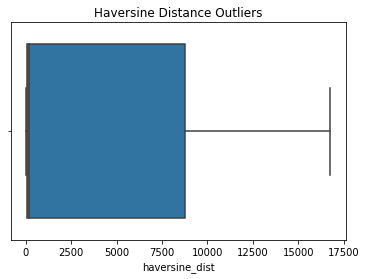

In [ ]:
# check outliers in haversine_distance
sns.boxplot(data = train
            ,x = 'haversine_dist')
plt.title('Haversine Distance Outliers')
plt.show()

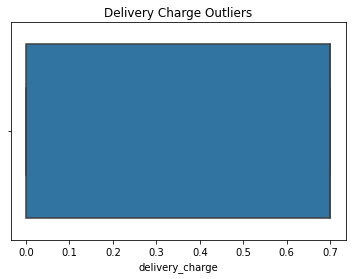

In [ ]:
# check outliers in numeric columns
sns.boxplot(data = train
            ,x = 'delivery_charge')
plt.title('Delivery Charge Outliers')
plt.show()

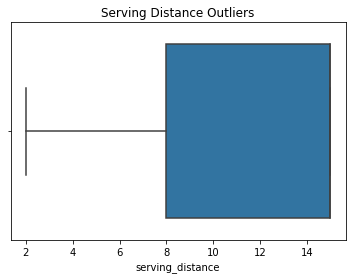

In [ ]:
# check serving distance outliers
sns.boxplot(data = train
            ,x = 'serving_distance')
plt.title('Serving Distance Outliers')
plt.show()

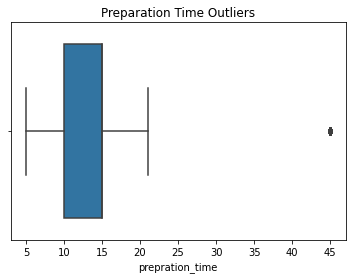

In [ ]:
# check outliers in preparation time
sns.boxplot(data = train
            ,x = 'prepration_time')
plt.title('Preparation Time Outliers')
plt.show()

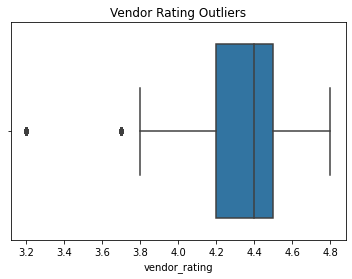

In [ ]:
# Check outliers in vendor ratings
sns.boxplot(data = train
            ,x = 'vendor_rating')
plt.title('Vendor Rating Outliers')
plt.show()

**The 'clean_train.csv' was exported to be used in modelling.**
